<a href="https://www.kaggle.com/code/utkarshx27/biopsy-cancer-classification-voting-classifier?scriptVersionId=138440269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="color:#159364; font-family:verdana;"> <center>Biopsy Cancer Classification Model</center> </h1>

<div class="alert alert-block alert-info" style="background-color:#b7f7c8; font-size:15px; font-family:verdana;">
➡️ This is a classic dataset for training and benchmarking machine learning algorithms.<br>
➡️ Biopsy features for classification of 569 malignant (cancer) and benign (not cancer) breast masses.<br>
➡️ Features were computationally extracted from digital images of fine needle aspirate biopsy slides. Features correspond to properties of cell nuclei, such as size, shape and regularity. The mean, standard error, and worst value of each of 10 nuclear parameters is reported for a total of 30 features.
 
| Column | Description |
| --- | --- |
| x.radius_mean | Mean radius of the tumor cells |
| x.radius_mean | Mean radius of the tumor cells |
| x.texture_mean | Mean texture of the tumor cells |
| x.perimeter_mean | Mean perimeter of the tumor cells |
| x.area_mean | Mean area of the tumor cells |
| x.smoothness_mean | Mean smoothness of the tumor cells |
| x.compactness_mean | Mean compactness of the tumor cells |
| x.concavity_mean | Mean concavity of the tumor cells |
| x.concave_points_mean | Mean number of concave portions of the contour of the tumor cells |
| x.symmetry_mean | Mean symmetry of the tumor cells |
| x.fractal_dimension_mean | Mean "coastline approximation" of the tumor cells |
| x.radius_se | Standard error of the radius of the tumor cells |
| x.texture_se | Standard error of the texture of the tumor cells |
| x.perimeter_se | Standard error of the perimeter of the tumor cells |
| x.area_se | Standard error of the area of the tumor cells |
| x.smoothness_se | Standard error of the smoothness of the tumor cells |
| x.compactness_se | Standard error of the compactness of the tumor cells |
| x.concavity_se | Standard error of the concavity of the tumor cells |
| x.concave_points_se | Standard error of the number of concave portions of the contour of the tumor cells |
| x.symmetry_se | Standard error of the symmetry of the tumor cells |
| x.fractal_dimension_se | Standard error of the "coastline approximation" of the tumor cells |
| x.radius_worst | Worst (largest) radius of the tumor cells |
| x.texture_worst | Worst (most severe) texture of the tumor cells |
| x.perimeter_worst | Worst (largest) perimeter of the tumor cells |
| x.area_worst | Worst (largest) area of the tumor cells |
| x.smoothness_worst | Worst (most severe) smoothness of the tumor cells |
| x.compactness_worst | Worst (most severe) compactness of the tumor cells |
| x.concavity_worst | Worst (most severe) concavity of the tumor cells |
| x.concave_points_worst | Worst (most severe) number of concave portions of the contour of the tumor cells |
| x.symmetry_worst | Worst (most severe) symmetry of the tumor cells |
| x.fractal_dimension_worst | Worst (most severe) "coastline approximation" of the tumor cells |
| y | target |

## Details (Important)
- y. The outcomes. A factor with two levels denoting whether a mass is malignant ("M") or benign ("B").
- x. The predictors. A matrix with the mean, standard error and worst value of each of 10 nuclear measurements on the slide, for 30 total features per biopsy:
- radius. Nucleus radius (mean of distances from center to points on perimeter).
- texture. Nucleus texture (standard deviation of grayscale values).
- perimeter. Nucleus perimeter.
- area. Nucleus area.
- smoothness. Nucleus smoothness (local variation in radius lengths).
- compactness. Nucleus compactness (perimeter^2/area - 1).
- concavity, Nucleus concavity (severity of concave portions of the contour).
- concave_pts. Number of concave portions of the nucleus contour.
- symmetry. Nucleus symmetry.
- fractal_dim. Nucleus fractal dimension ("coastline approximation" -1).



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [3]:
num_columns = ['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst']

def summary(df):
    print(f'data shape: {df.shape}')

    summ = pd.DataFrame(columns=['dtype', 'missing', 'missing[%]', 'unique', 'min', 'max', 'median', 'std', 'outliers', 'lower_bound', 'upper_bound'])

    for col in num_columns:
        summ.loc[col, 'dtype'] = df[col].dtype
        summ.loc[col, 'missing'] = df[col].isnull().sum()
        summ.loc[col, 'missing[%]'] = df[col].isnull().sum() / len(df) * 100
        summ.loc[col, 'unique'] = df[col].nunique()
        summ.loc[col, 'min'] = df[col].min()
        summ.loc[col, 'max'] = df[col].max()
        summ.loc[col, 'median'] = df[col].median()
        summ.loc[col, 'std'] = df[col].std()

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        summ.loc[col, 'outliers'] = outliers.count()
        summ.loc[col, 'lower_bound'] = lower_bound
        summ.loc[col, 'upper_bound'] = upper_bound

    return summ

summary(data)

data shape: (569, 31)


,dtype,missing,missing[%],unique,min,max,median,std,outliers,lower_bound,upper_bound
x.radius_mean,float64,0,0.0,456,6.981,28.11,13.37,3.524049,14,5.58,21.9
x.texture_mean,float64,0,0.0,479,9.71,39.28,18.84,4.301036,7,7.725,30.245
x.perimeter_mean,float64,0,0.0,522,43.79,188.5,86.24,24.298981,13,31.775,147.495
x.area_mean,float64,0,0.0,539,143.5,2501.0,551.1,351.914129,25,-123.3,1326.3
x.smoothness_mean,float64,0,0.0,474,0.05263,0.1634,0.09587,0.014064,6,0.057975,0.133695
x.compactness_mean,float64,0,0.0,537,0.01938,0.3454,0.09263,0.052813,16,-0.0333,0.22862
x.concavity_mean,float64,0,0.0,537,0.0,0.4268,0.06154,0.07972,18,-0.12215,0.28241
x.concave_pts_mean,float64,0,0.0,542,0.0,0.2012,0.0335,0.038803,10,-0.060225,0.154535
x.symmetry_mean,float64,0,0.0,432,0.106,0.304,0.1792,0.027414,15,0.1112,0.2464
x.fractal_dim_mean,float64,0,0.0,499,0.04996,0.09744,0.06154,0.00706,15,0.04507,0.07875


In [4]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
classifiers = [
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True)),
    ('gbm', GradientBoostingClassifier())
]

feature_engineering = [
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_classif))
]

pipelines = {}
for clf_name, clf in classifiers:
    pipeline = Pipeline(feature_engineering + [('classifier', clf)])
    pipelines[clf_name] = pipeline

param_grids = {
    'rf': {
        'feature_selection__k': [5, 10, 15],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10]
    },
    'svm': {
        'feature_selection__k': [5, 10, 15],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
    },
    'gbm': {
        'feature_selection__k': [5, 10, 15],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.05, 0.01],
        'classifier__max_depth': [3, 5, 10],
    }
}

best_models = {}
for clf_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[clf_name], cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[clf_name] = grid_search.best_estimator_

voting_clf = VotingClassifier(list(best_models.items()), voting='soft')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
print("Best Model Combination (Voting Classifier) Results:")
print(classification_report(y_test, y_pred))

Best Model Combination (Voting Classifier) Results:
              precision    recall  f1-score   support

           B       0.92      0.97      0.95        71
           M       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



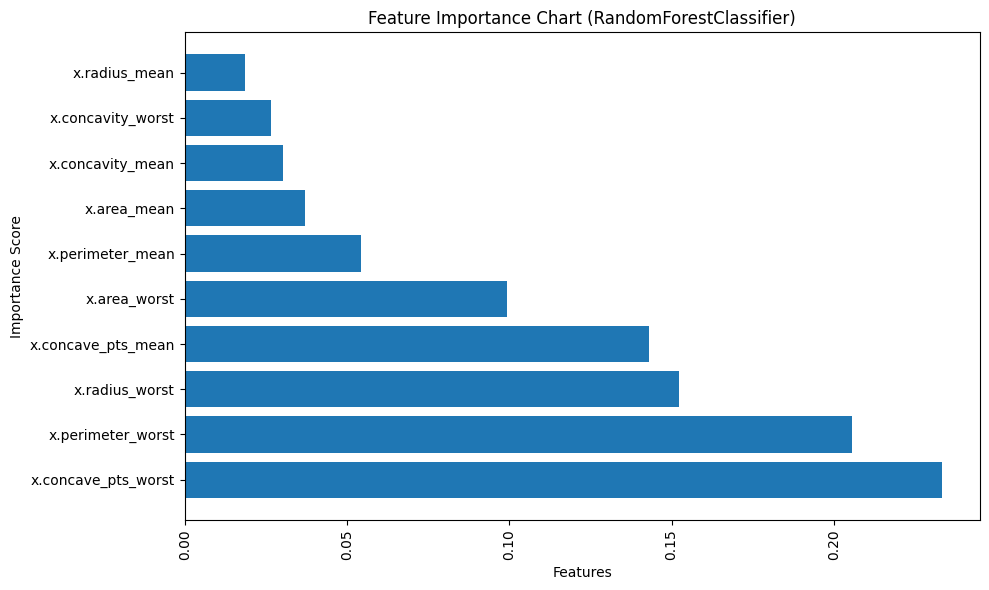

In [6]:
feature_selector = SelectKBest(f_classif, k=10)
X_train_selected = feature_selector.fit_transform(X_train, y_train)

selected_feature_names = X.columns[feature_selector.get_support(indices=True)]

rf = RandomForestClassifier()
rf.fit(X_train_selected, y_train)

feature_importance_scores = rf.feature_importances_

sorted_indices = feature_importance_scores.argsort()[::-1]
sorted_feature_names = selected_feature_names[sorted_indices]
sorted_scores = feature_importance_scores[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_scores)), sorted_scores, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Chart (RandomForestClassifier)')
plt.tight_layout()
plt.show()

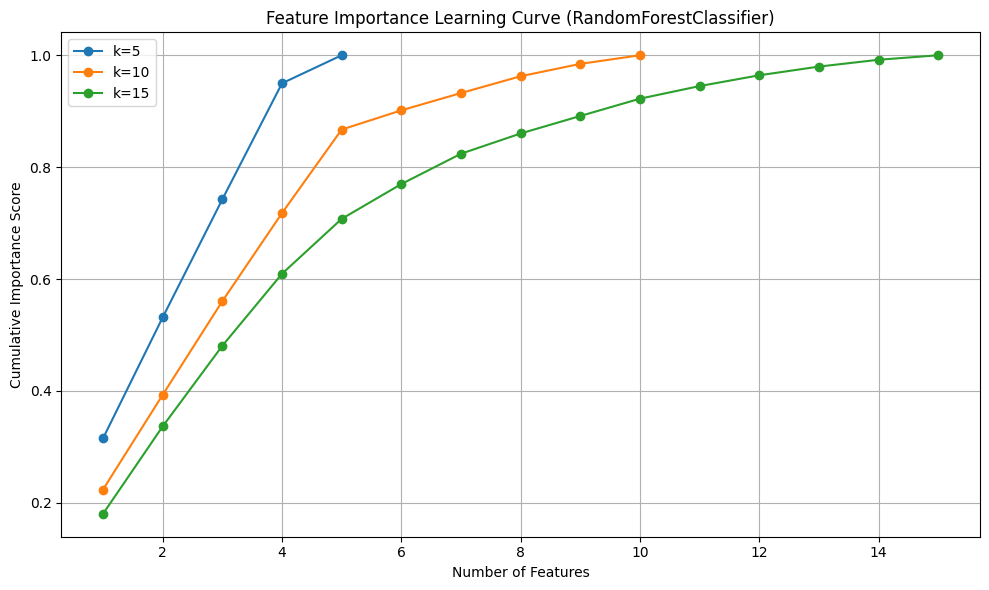

In [7]:
k_values = [5, 10, 15]
cumulative_importance_scores = []

for k in k_values:
    feature_selector = SelectKBest(f_classif, k=k)
    X_train_selected = feature_selector.fit_transform(X_train, y_train)
    selected_feature_names = X.columns[feature_selector.get_support(indices=True)]

    rf = RandomForestClassifier()
    rf.fit(X_train_selected, y_train)
    
    feature_importance_scores = rf.feature_importances_
    sorted_scores = np.sort(feature_importance_scores)[::-1]
    cumulative_importance = np.cumsum(sorted_scores)
    cumulative_importance_scores.append(cumulative_importance)

plt.figure(figsize=(10, 6))
for i, k in enumerate(k_values):
    plt.plot(range(1, len(cumulative_importance_scores[i]) + 1), cumulative_importance_scores[i], marker='o', label=f'k={k}')

plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance Score')
plt.title('Feature Importance Learning Curve (RandomForestClassifier)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()